# Computational Physics Project 3: Monte Carlo Techniques for neutron shielding

Student ID 10921729 <br>
University of Manchester<br>
Febuary 2023

In [1]:
# Initialisation
import string
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import N_A
import time as clock

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Aims

The aim of this project is to use random modelling techniques such as Monte Carlo, in order to accurately model thermal neutrons travelling through different materials.
The first section of this report primarily focuses on determining the best function for creating a truly uniform distribution. 
The main results from these simulations have many real-life applications, especially within the design of nuclear reactors these applications will be discussed throughout. The main materials of focus during this experiment are: water, lead and graphite. However, Boron is also tested in order to understand its use in nuclear reactors.

## Uniform number Generation

This cell focuses on proving that np.random.uniform does create a uniform distribution. <br>
This is done by simulating the roll of a die multiple times. For each roll of the die its value is recorded and is later the frequency of each value is plot in a histogram plot. In order to prove that the distribution a large sample size must be taken. If the data is in fact uniformly distributed then the frequency of each value, and therefore the height of bar in the histogram, should become roughly even. <br>
It is assumed that the height of the bins can be described by a gaussian distribution, meaning each bin can be expected to have a fluctuation described by:
$$
\sigma  = \sqrt{\mu} \space\space\space (1)
$$
where $\sigma$ is the fluctuation and $\mu$ is the mean value of the bins. However in practice this error is generally smaller as it is actually binomially distributed. 

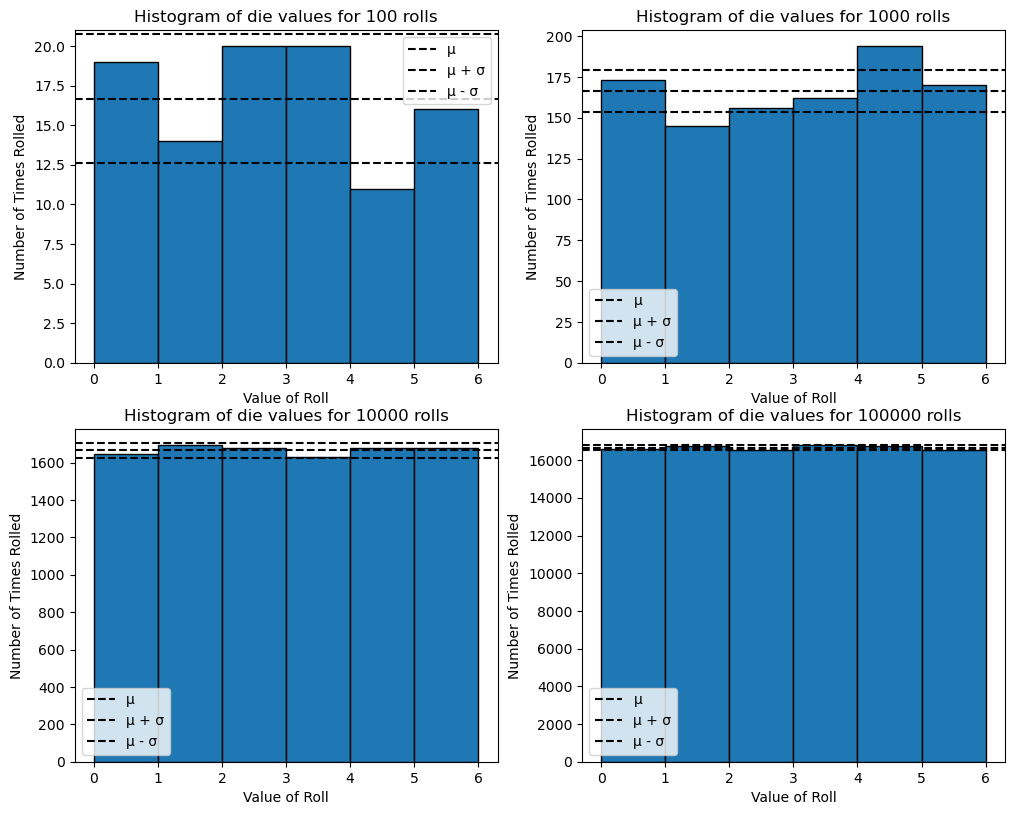

In [2]:
def histogram(number_rolls):
    """
    Creates 4 histograms which each correspond to the value of a die which is rolled a different amount of times  

    Parameters
    ----------
    number_rolls : 1D numpy array
    
    Returns
    -------

    """
    #creates histogram data for the different samples sizes 
    histogram_data_1 = np.random.uniform(0,6, size = number_rolls[0])
    histogram_data_2 = np.random.uniform(0,6, size = number_rolls[1])
    histogram_data_3 = np.random.uniform(0,6, size = number_rolls[2])
    histogram_data_4 = np.random.uniform(0,6, size = number_rolls[3])
    #stores data in an array to allow the use of a for loop when plotting in order to make code neater
    histogram_data = np.array([histogram_data_1,histogram_data_2,histogram_data_3,histogram_data_4],dtype=object)
    #defines the edges of the bins for later use in ax.hist
    bin_size = np.arange(0,7,1)
    #calculates the mean and error for all sample sizes 
    mean = number_rolls*1/np.max(bin_size)
    error  = np.sqrt(mean)
    #creates figure and sets axes 
    fig = plt.figure(figsize = [12,9.5])
    axes = fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)
    #for loop creating a histogram plot with a line showing mean
    #as well as 2 other lines showing 1 error above and below the mean for every sample size 
    for i in range(0,4,1):
        axes[i].hist(histogram_data[i], bins = bin_size, ec = 'k')
        axes[i].axhline(mean[i], label = '\u00B5', linestyle = 'dashed', c = 'k' )
        axes[i].axhline(mean[i] + error[i], label = '\u00B5 + \u03C3', linestyle = 'dashed', c = 'k' )
        axes[i].axhline(mean[i] - error[i], label = '\u00B5 - \u03C3', linestyle = 'dashed', c = 'k' )
        axes[i].set_xlabel('Value of Roll')
        axes[i].set_ylabel('Number of Times Rolled')
        axes[i].set_title('Histogram of die values for {0} rolls'.format(number_rolls[i]))
        axes[i].legend()

    plt.show()
    
    return
rolls = np.array([100,1000,10000,100000])
histogram(rolls)
%matplotlib inline 

As can be seen in the graphs above when the sample size is small (e.g 100 rolls), the distribution does not show any semblance of uniformity but does show a large level of fluctuation. <br> 
However, when the sample size is 100 times larger, the difference in the heights of the bars becomes negligible in comparison to the true height of the bars. It can also be seen that the fluctuations in the heights of the bars become much smaller. This clearly proves that np.random.uniform does create a truly uniform random distribution as required.

## 3-D number generation and spectral lines 

A pseudo-random number generator(PRNG) is a deterministic computational process that has one or more inputs called "seeds", and it outputs a sequence of values that appears to be random according to specified statistical tests  [2]. A common type of PNRG is a Linear Congruential Generator (LCG), which generates an apparently random sequence of numbers using: 
$$
X_{n+1} = (aX_{n} + c)\space mod(x) \space\space\space (2)
$$
<br>Where $X_{n}$ is the nth number in the sequence, a is the multiplier, c is the increment, and x is the modulus. <br>
A LCG will create a statistically uniform distribution, however due to the use of equation (2) the sequence created is never truly random and can be predicted if the first number is known. The main flaw of LCGs is presented by Marsaglias’ theorem [3] which states that since LCGs are not truly random, then if a scatter plot of a points from a LCG generated sequence are potted in 3d then a phenomenon known as hyperplanes will present itself.<br>
The interactive plots below test np.random.uniform against a function called randssp which utilises equation (2) in an effort to prove that np.random.uniform does not exhibit any hyperplanes


<IPython.core.display.Javascript object>


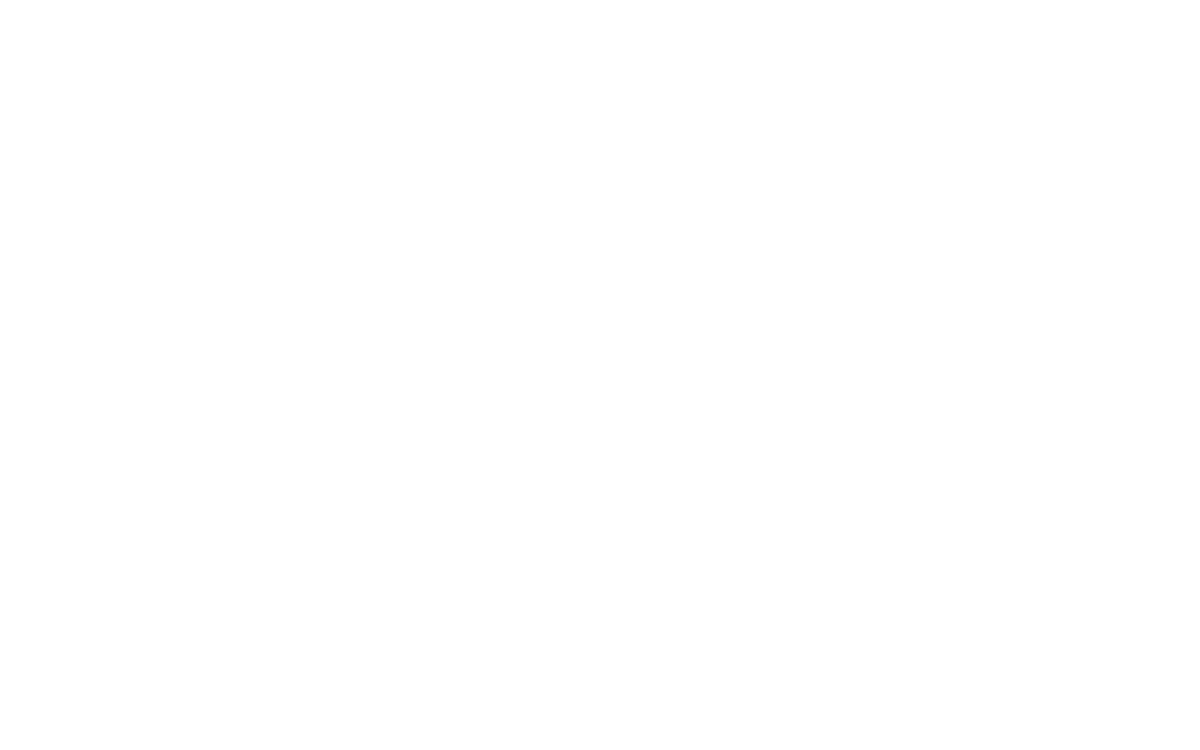

In [3]:
# magic line in order to make 3d plots interactive
%matplotlib notebook
%matplotlib notebook

def randssp(p,q):
    """
    Creates position vectors for points in 3-d. Points are supposed to be random distributed, 
    however they show the phenomenom of spectal lines.  

    Parameters
    ----------
    p : integer 
        Correspnds to number of desired dimensions
    q : integer
        corresponds to amount of desired points

    Returns
    -------
    r : numpy array
        contains x,y,z corords of q points 
    """
        
    try: x
    except NameError:
        m = pow(2, 31) 
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    return r

def spectral_lines (points):
    """
    Creates position vectors for a variable amount of points in 3-d. Points are randomly distributed, 
    these points show a clear absense of spectal lines.  

    Parameters
    ----------
    points : integer

    Returns
    -------
    x : numpy array
    y : numpy array
    z : numpy array
    """
    #assigns a random value to x,y,z using np.random.uniform
    r = np.random.uniform(-1,1, size =(3,points))
    x_temp,y_temp,z_temp = r[0], r[1], r[2]

    return x_temp,y_temp,z_temp
# runs randssp defining (dimensions, number of points)
r = randssp(3,1000)

x_1,y_1,z_1 = spectral_lines(1000)


fig = plt.figure(figsize = [8,5])
axes = fig.add_subplot(121, projection = '3d'), fig.add_subplot(122, projection = '3d')
#creates scatter plots of the points created using randssp and np.random.uniform
axes[0].scatter(r[0,:], r[1,:], r[2,:], color='r')
axes[1].scatter(x_1,y_1,z_1, color='r')
titles = np.array(['randssp \n(hyperplanes present)','np.random.uniform \n(no hyperplanes present)'])
#setting axes labels and titles
for i in range(len(axes)):
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_zlabel('z')
    axes[i].set_title(titles[i])
    #setting initial orientation of the plots to show hyperplanes
    axes[i].view_init(50,65)
    

fig.suptitle('Random Uniform Distribution in 3-D')
plt.show()

## Neutron traveling in 1-D (absobtion only)

The next stage of this report focusses on building a simple model of thermal neutrons traveling through a slab of material. In this cell neutrons are modelled as travelling in 1d through a slab of water, assuming that absorption is the only interaction available within the water slab. Before the neutrons path can be determined the mean free path of this slab must be calculated. This is done using:
<br>
$$
\lambda = 1/n\sigma_a \space\space\space (3)
$$<br>
Where n is the number density of the slab and $\sigma$ is the microscopic absorption cross section of water. The denominator of equation (3) is also referred to as the macroscopic cross section of water $\Sigma$.<br>
From this the neutrons path is described using an exponential distribution:<br> 
$$
\exp{-s/\lambda} \space\space\space (4)
$$<br>
where $s$ is the distance travelled, and $\lambda$ is the mean free path. This is done using: <br>
$$
s = -\lambda \ln(u_i) \space\space\space (5)
$$<br>
where $u_i$ is a randomly generated number. <br>
The probability that a neutron will be absorbed in this slab, $p_a$ is defined as:<br>
$$
P_a = \Sigma_a/\Sigma_t \space\space\space (7)
$$<br>
Where $\Sigma_t$ is the total macroscopic cross section , in this case this is just $\Sigma_a$ however later in this report it will become dependent on the macroscopic scattering cross section as well <br>
This model is repeated several times, with the data being stored as a frequency of neutrons that made it within a ceratin distance (just like the histograms used previously). The mean and standard deviation of this data is then acquired. A 1st order polynomial (straight line) is fitted to the log of this data, resulting in a line with a gradient, $m$, which can be easily related to the attenuation length, $\lambda_A$ using: <br>
$$
\lambda_A = -1/m \space\space\space(8)
$$

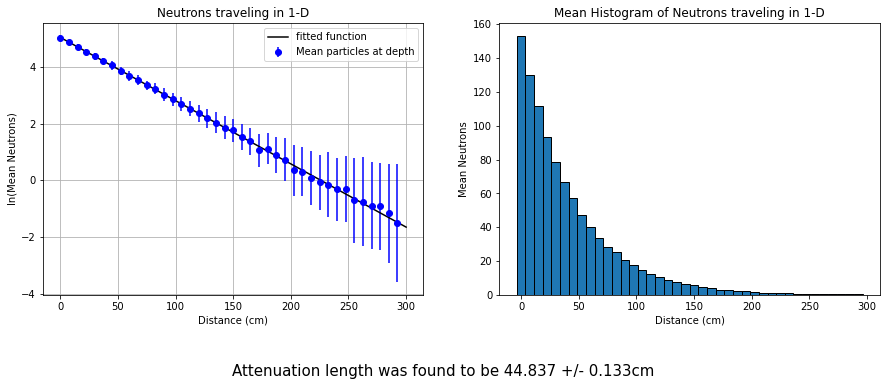

In [4]:
#stops all graphs from becoming interactive
%matplotlib inline  

def attenuation_length(particles,iterations,no_bins,density,mass, absorbtion_area):
    """
    Calclates the attenuation length of a material whose only interation with neutrons is absorbtion.
    This process is repeated a variable amoount of times in order to gain a more accurate attenuation length 
    as well as errors for each value.
    Parameters
    ----------
    particles : integer
    iterations : integer
    no_bins : integer
    density : integer
    mass : integer
    absorbtion_area : integer
    
    Returns
    -------

    """
    #calculating number density and mean free path of water from density mass and absorption area
    number_density = N_A*density/mass
    mean_freepath = 1/(number_density*absorbtion_area*10**-24)
    #sets the number of desired bins for the histograms 
    no_bins = int(no_bins)
    n_r = np.zeros((iterations,no_bins))
    mean_freq= np.zeros(no_bins)
    std_freq= np.zeros(no_bins)
    # creates and stores data from multiple histograms  
    for i in range(iterations):
        distance = -mean_freepath*np.log(np.random.uniform(size = particles))
        #max distance of each histogram is set at 300cm in order to keep bin size the same for all iterations 
        n_r[i,:], r_i = np.histogram(distance,range = (0,300),bins = no_bins)
    #deleting the last value in the bin array in order to make it the same size as the n_r data
    r_i_fixed = r_i[:-1]
    # calculates the mean and standard deviation for each bin of data
    for i in range(no_bins):
        mean_freq[i] = np.mean(n_r[:,i])
        std_freq[i] = np.std(n_r[:,i])
    #deleting all values where no particles made it for all iterations    
    std_freq = np.delete(std_freq,np.argwhere(mean_freq == 0))
    r_i_fixed =  np.delete(r_i_fixed,np.argwhere(mean_freq == 0))
    mean_freq = np.delete(mean_freq,np.argwhere(mean_freq == 0))
    #preforms a weighted straight line fitting to the log of the mean histogram data
    coeff,error = np.polyfit(r_i_fixed,np.log(mean_freq),1,cov = True,w=mean_freq/std_freq)
    m = coeff[0]
    c = coeff[1]
    #assigns the errors for polyfit coefficients
    coeff_errors = np.sqrt(np.diag(error))
    #calculates attenuation length and error on length using values returned by np.polyfit
    length = -1/m
    length_error = coeff_errors[0]/m**2
    #calculates the y values for the polyfitted parameters 
    fit_y = m*np.linspace(0,300,1000) + c
    #plots mean histogram data along with the fitted straight line data
    fig = plt.figure(figsize = [15,5])
    ax_1 = fig.add_subplot(121)
    #y error on the histogram is assigned as standard deviation / mean histogram data
    ax_1.errorbar(r_i_fixed,np.log(mean_freq),yerr = std_freq/mean_freq,fmt='bo',label = 'Mean particles at depth')
    ax_1.plot(np.linspace(0,300,1000),fit_y,'k-',label = 'fitted function')
    ax_1.grid(True)
    ax_1.set_title('Neutrons traveling in 1-D')
    ax_1.set_ylabel('ln(Mean Neutrons)')
    ax_1.set_xlabel('Distance (cm)')
    ax_1.legend()
    #plots mean histogram data using plt.bar fuction 
    ax_2 = fig.add_subplot(122)
    ax_2.bar(r_i_fixed, mean_freq,width = 300/no_bins, ec = 'k' )
    ax_2.set_title('Mean Histogram of Neutrons traveling in 1-D')
    ax_2.set_ylabel('Mean Neutrons')
    ax_2.set_xlabel('Distance (cm)')
    plt.figtext(0.3,-0.1,('Attenuation length was found to be {0:#.3f} +/- {1:#.3f}cm'.format(length,length_error)),fontsize =15)

    plt.show()
    #calculates attenuation length from gradient coefficient returned by np.polyfit 
attenuation_length(1000,100,40,1,18.0153,0.6652)

    

Above is a graph showing the straight-line fitting to the log of the mean histogram data (left), as well as a histogram representing the mean histogram of all the data (right). The mean histogram clearly confirms that the distribution of the simulated particles follows the exponential relation from equation (3).  

## Uniform spherical distribution

It has already been proven that np.random.uniform creates a truly uniform distribution with an absence of hyperplanes. However, when attempting to uniformly plot points along the edge of a sphere a new bias arises around the poles when attempting to random distribute the points using the regular $\theta$ and $\phi$ limits for a sphere, as shown below.
$$
x = rsin(\theta_i)cos(\phi_i) \\
y = rsin(\theta_i)sin(\phi_i)\\
z = rcos(\theta_i)\\
0 \leq \phi_i \geq 2\pi \\
0 \leq \theta_i \geq \pi
$$
The plots below show points plotted along spheres of radius 1. The limit on $\theta_i$ causes uniform distribution along the circular cross sections within the sphere at different heights. This is the explanation for the poles appearing, as the cross section at the top and bottom of the sphere is much smaller than the equatorial cross section. Yet all cross sections have the same number of points distributed within them, leading the poles to be much more densely pack than anywhere else. <br> 
The solution to this is to $\theta_i$ values using: 
$$
\theta_i= acos(1-2u_i)
$$


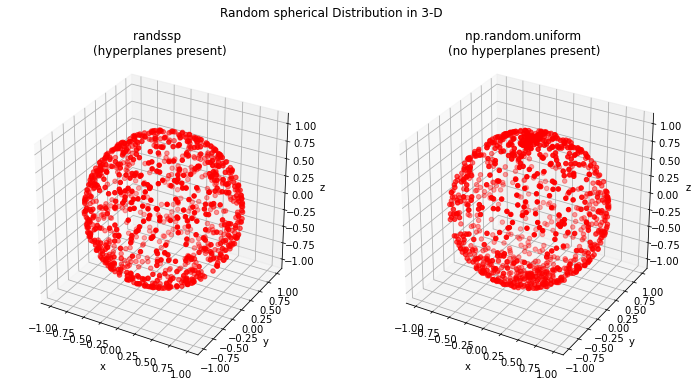

In [5]:
def isotropic_vectors(particles):
    """
    Produces a number of isotropically distributed in spherical polar coords, all with the same radius.
    
    Parameters
    ----------
    particles : integer
    Returns
    -------
    x : numpy array
    y : numpy array
    z : numpy array
    """
    #creates x, y, z values which are uniformly distributed on the surface of a sphere of radius 1
    theta = np.arccos(1 - 2*np.random.uniform(size = particles))
    phi = np.random.uniform(0,2*np.pi, size = particles)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)

    return x, y,z

def poles(particles):
    """
    produces a number of points distributed in spherical polar coords, showing 'poles' around the north and south hemispheres
    due to incorrect calculation of theta values 
    
    Parameters
    ----------
    particles : integer
    
    Returns
    -------
    x : numpy array
    y : numpy array
    z : numpy array
    """
    #creates x, y, z values which showcase the afore mentioned poles 
    theta = np.random.uniform(0,np.pi, size = particles)
    phi = np.random.uniform(0,2*np.pi, size = particles)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    return x,y,z

iostrpoic_coords = isotropic_vectors(1000)
pole_coords = poles(1000)

fig_1 = plt.figure(figsize = [12,6])
axes = fig_1.add_subplot(121,projection = '3d'), fig_1.add_subplot(122,projection = '3d')
axes[0].scatter(iostrpoic_coords[0],iostrpoic_coords[1],iostrpoic_coords[2],color='r')
axes[1].scatter(pole_coords[0],pole_coords[1],pole_coords[2], c ='r')
titles = np.array(['randssp \n(hyperplanes present)','np.random.uniform \n(no hyperplanes present)'])

for i in range(len(axes)) :
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_zlabel('z')
    #sets the aspect of the graph in order to view the spheres better
    axes[i].set_box_aspect(aspect = (1,1,1))
    axes[i].set_title(titles[i])

fig_1.suptitle('Random spherical Distribution in 3-D')
plt.show()

It is clear to see that the right most graph shows poles on the top and bottom of the sphere as apposed the graph on the left which shows a true uniform distribution of points along the edge of a sphere.

## Random step within sphere

This section utilises the exponential distribution form equation (4) in unison with the spherical distribution code develop above. <br>
By using equation (4) to create a random radius for each point it is possible to create isotropic steps for a large set of particles at once. This will be incredibly useful later on as it allows each neutron to be scattered in a completely random direction, by a random distance if they are not absorbed by a material.


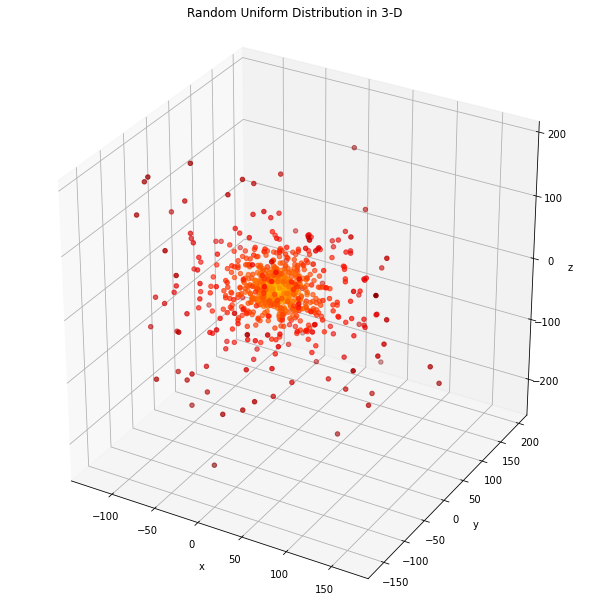

In [6]:
def random_step (particles, mean_freepath):
    """
    This function generates a random step for the number of particles entered.
    The radius of these steps are distributed randomly along the mean free path of the particles 
    
    Parameters
    ----------
    particles : integer
    mean_freepath : integer
    
    Returns
    -------
    x : numpy array
    y : numpy array
    z : numpy array
    """
    #Generates a random radius, theta and phi for every particle
    distance = -mean_freepath*np.log(np.random.uniform(size = particles))
    theta = np.arccos(1 - 2*np.random.uniform(size = particles))
    phi = np.random.uniform(0,2*np.pi, size = particles)
    #uses distance and angle values to create x,y,z coordinates for particles 
    x = distance*np.sin(theta)*np.cos(phi)
    y = distance*np.sin(theta)*np.sin(phi)
    z = distance*np.cos(theta)
    return x, y, z

def distribution(particles,mean_freepath):
    """
    plots random steps on a 3-d plot
    
    Parameters
    ----------
    particles : integer
    mean_freepath : integer
    
    Returns
    -------

    """

    x,y,z = random_step(particles,mean_freepath)
    # calculates the radius of each point as a ratio to mean free path and then logs this in order to allow for a color map to be used 
    radius = np.sqrt(x**2+y**2+z**2)
    r = np.log(radius/mean_freepath)
    
    fig = plt.figure(figsize = [9,8])
    ax = Axes3D(fig)
    
    ax.scatter(x,y,z,c = r ,cmap = 'jet' )

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Random Uniform Distribution in 3-D')
    ax.set_box_aspect(aspect = (1,1,1))

    plt.show()
    
    
distribution(1000,45)

The graph above shows particles which are all taking one random step, proving that random_step is suitable for later use in neutron scattering simulations. A colour map has been fitted to this graph in order to make it easier to distinguish the distance of each particle, the inner most particles will appear as a bright yellow with the colour blending into red as the radius of each step increases.  

## Markov Chain Monte Carlo 

A Markov Chain Monte Carlo [4] entails a sequence of randomly produced parameters which are still link to a previous step, introducing the idea of random history without submitting to a predictable sequence such as in an LCG.

### Visualisation

Here 5 neutrons are visualised travelling within a 10cm slab of three materials: water, lead and graphite. These visualisations are represented by a figure including a 3d plot of the particle’s histories, as well as two plots showing the path of the neutrons on the x-y axis as well as on the x-z axis. The end points of each neutrons journey have been marked by unique markers signifying what process caused the end of the neutron’s life (e.g.: backscattering, absorption or transmission). A localised seed has been used in the visulise_path function to ensure that the function creates same paths on the first running of the code to allow for a thorough analysis of each material. This seed is localised and will not impact the rest of the report, however if a truly random path is required then all that is required is to comment out the line np.random.seed(29) and then a truly random path for each material will be generated. Once the code has been run a random seed is set using the current time to allow for true random analysis to be achieved throughout the rest of the project. <br>
Two main assumptions are made in order to model the thermal neutrons, the assumptions are: <br> 
- neutrons initially enter the slab horizontally <br>
- after taking a step, if a neutron is not absorbed then the probability of the neutron being scattered in a particular direction is equal for all directions <br>

As scattering is now allowed the total macroscopic cross section, equation (6), will change, due to the addition of another possible process: 
$$
\Sigma_t = n\sigma_a + n\sigma_s\space\space\space (9)
$$
Where $\sigma_s$ is the microscopic scattering cross section of the material. It is obvious from this that the mean free path as well as the probability of absorption for a thermal neutron will change drastically.


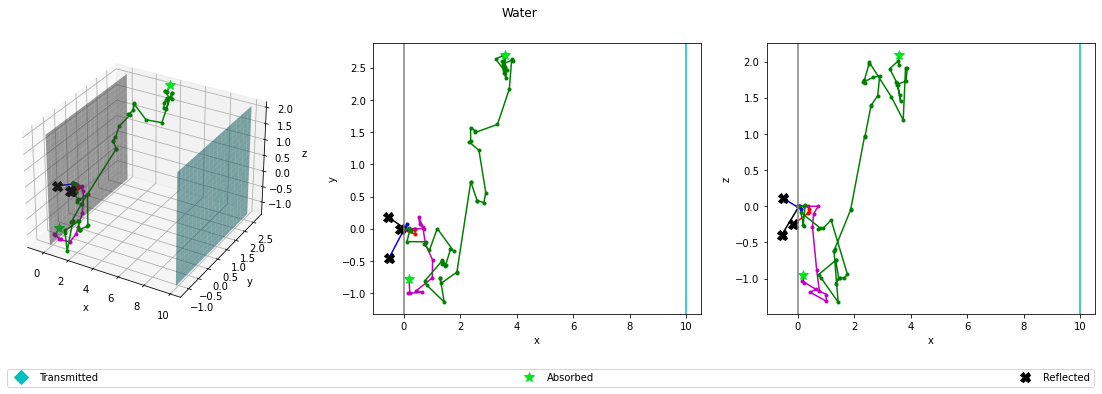

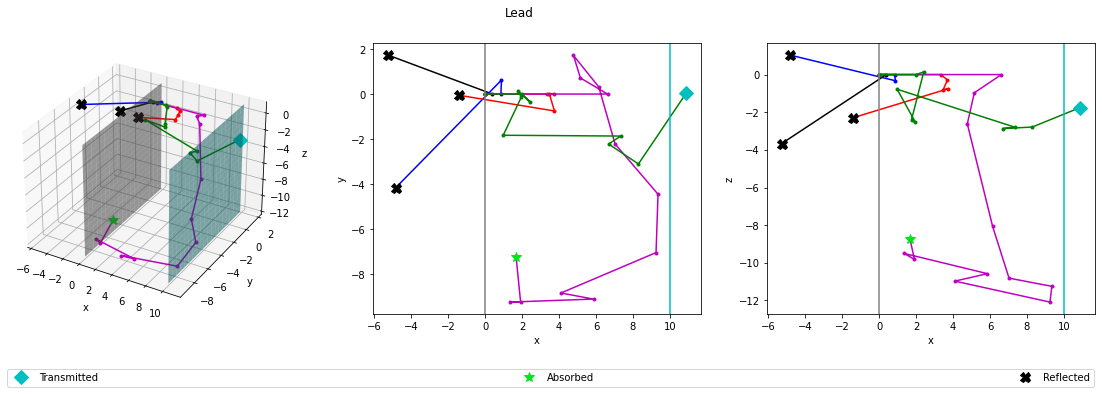

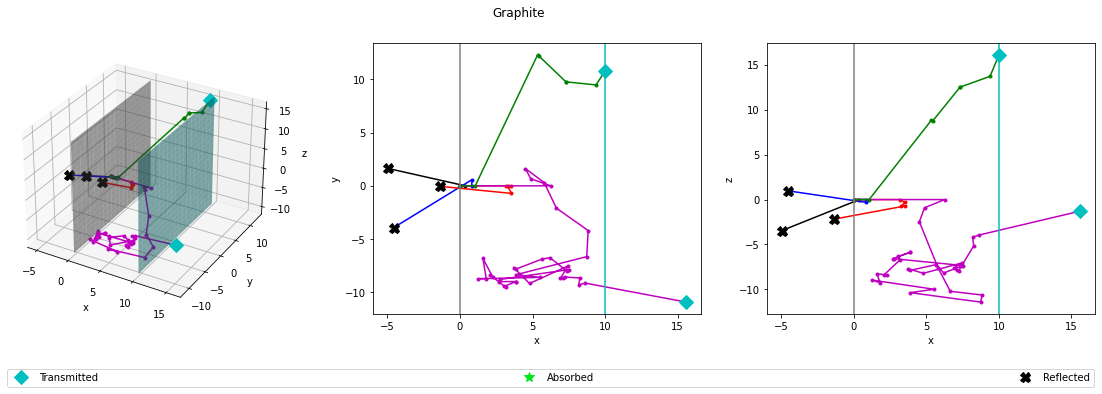

In [7]:
def visulise_path(absorbtion_area,scattering_area,density,mass, particles, thickness, material):
    """
    This function will create a plot to show how a certain amount of particles will move within a perticular material.
    It then will show both a side-on and top view of these particles travelling
    Parameters
    ----------
    absorbtion_area : float
    scattering_area : float
    density : float
    mass : float
    particles : integer
    thickness : float
    material : string
    
    Returns
    -------

    """
    #sets a seed so that paths are predictable from this line onwards
    np.random.seed(29)
    #calculates number density and mean free path of material 
    number_density = N_A*density/mass
    mean_freepath = 1/(number_density*(absorbtion_area*10**-24 + scattering_area*10**-24))
    #generates the probability of a thermal neutron being absorbed 
    prob_absorbtion = (number_density*absorbtion_area*10**-24)/(number_density*(absorbtion_area*10**-24 + scattering_area*10**-24))
    #create axis for plots
    fig = plt.figure(figsize = [20,5])
    axes = fig.add_subplot(131, projection = '3d'),fig.add_subplot(132),fig.add_subplot(133)
    #set axis titles 
    for i in range(len(axes)):
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
    axes[0].set_zlabel('z')
    axes[2].set_ylabel('z')
    #array of colours for each particle 
    colours = np.array(['k','b','r','m','g'])
    #min and max arrays created in order to model a plane on 3d plot showing edges of the slab 
    max_y = np.zeros(particles)
    min_y = np.zeros(particles)
    max_z = np.zeros(particles)
    min_z = np.zeros(particles)
    #final position arrays created to allow for markers to be set to show end event of each neutron 
    final_x = np.zeros(particles)
    final_y = np.zeros(particles)
    final_z = np.zeros(particles)
    #calculates the path of each neutron 
    for i in range(particles):
        #first step is outside of while loop as neutron must enter into the slab horizontally
        #state that neitron is still alive
        absorbed = False
        transmitted = False
        reflected = False
        #array of positional values will be used for memory of neutron path 
        #set initial position as (0,0,0)
        x_values = np.array([0])
        y_values = np.array([0])
        z_values = np.array([0])
        
        #calculate initial distance that neutrons enter into slab 
        x = -mean_freepath*np.log(np.random.uniform())
        y = 0
        z = 0
        #adds nuetrons current position to array
        x_values = np.append(x_values, x)
        y_values = np.append(y_values, y)
        z_values = np.append(z_values, z)
        #generate probabiity of absorbtion for each neutron 
        probability = np.random.uniform()
        #checks if the neutron has left the slab or been absorbed and will continue if not
        if x>thickness :     
            transmitted = True

        elif probability<prob_absorbtion: 
            absorbed  = True

        #while loop ensures neutrons path cannot end until it has either left the slab or has been absorbed 
        while not(absorbed) and not(transmitted) and not(reflected) : 
            #calculate random 3d step for neutron using function in a previous cell
            x_step, y_step,z_step = random_step(1,mean_freepath)
            #adds random step to previous position of neutron
            x += x_step
            y += y_step
            z += z_step
            #adds new psoiton to neutron history 
            x_values = np.append(x_values, x)
            y_values = np.append(y_values, y)
            z_values = np.append(z_values, z)
            probability = np.random.uniform()
            #checks if neutron has left slab or been absorbed and will repeat process if not 
            if x>thickness:     
                transmitted = True
            elif x < 0 :
                reflected = True

            elif probability<= prob_absorbtion: 
                absorbed  = True
        # adds min and max y and z values to arrays for later use 
        max_y[i] = np.max(y_values)
        min_y[i] = np.min(y_values)
        max_z[i] = np.max(z_values)
        min_z[i] = np.min(z_values)
        #plots array of path history of the neutron in 3d and in 2d for x-y, x-z axis
        axes[0].plot(x_values,y_values,z_values, c = colours[i], marker = 'o',markersize = 3, linestyle = '-')
        axes[1].plot(x_values,y_values, c = colours[i], marker = 'o',markersize = 3, linestyle = '-')
        axes[2].plot(x_values,z_values, c = colours[i], marker = 'o',markersize = 3, linestyle = '-')
        #noting the final position of the neutron before visualising next neutron 
        final_x [i] = x_values[-1]
        final_y [i] = y_values[-1]
        final_z [i] = z_values[-1]
    #defines whether neutrons path finished due to reflection, transmission or absorption 
    transmitted = np.where(final_x>thickness)
    reflected = np.where(final_x<0)
    absorbed = np.where((final_x>=0) & (final_x <=thickness))
    #plots end events of each neutron on all graphs
    axes[0].plot(final_x[transmitted],final_y[transmitted],final_z[transmitted], c = 'c', marker = 'D', markersize = 10, linestyle = '', label = 'Transmitted')
    axes[0].plot(final_x[absorbed],final_y[absorbed],final_z[absorbed], c = ((0,0.9,0.1,1)), marker = '*', markersize = 10, linestyle = '',label = 'Absorbed')
    axes[0].plot(final_x[reflected],final_y[reflected],final_z[reflected], c = 'k', marker = 'X', markersize = 10, linestyle = '',label = 'Reflected')
                                                                      
    axes[1].plot(final_x[transmitted],final_y[transmitted], c = 'c', marker = 'D', markersize = 10, linestyle = '')
    axes[1].plot(final_x[absorbed],final_y[absorbed], c = ((0,0.9,0.1,1)), marker = '*', markersize = 10, linestyle = '')
    axes[1].plot(final_x[reflected],final_y[reflected], c = 'k', marker = 'X', markersize = 10, linestyle = '')
    
    axes[2].plot(final_x[transmitted],final_z[transmitted], c = 'c', marker = 'D', markersize = 10, linestyle = '')
    axes[2].plot(final_x[absorbed],final_z[absorbed], c = ((0,0.9,0.1,1)) , marker = '*', markersize = 10, linestyle = '')
    axes[2].plot(final_x[reflected],final_z[reflected], c = 'k', marker = 'X', markersize = 10,linestyle = '')
    #creates mesh grid of z and y values ranging from the min to max value of each 
    y = np.linspace(np.min(min_y),np.max(max_y), 20)
    z = np.linspace(np.min(min_z),np.max(max_z), 20)
    yy,zz = np.meshgrid(y,z)
    #defines edges of the slab on x axis
    xx_min = 0
    xx_max = thickness
    #meshgrids are used to create planes on the 3d graph showing the edges of the slab 
    axes[0].plot_surface(xx_min,yy,zz, color = 'grey', alpha = 0.5)
    axes[0].plot_surface(xx_max,yy,zz, color = 'c', alpha = 0.5)
    #create vertical lines showing edges of slab in 2d plots 
    for i in range(len(axes) - 1):
        axes[i+1].axvline(0, c = 'grey')
        axes[i+1].axvline(thickness, c = 'c')
    #Isolates ledgend of 3d graph and expands it so it spans the width of the figure 
    axes[0].legend(bbox_to_anchor = (0,-0.8,4,0.6), borderaxespad=0 ,mode = 'expand',ncol=3)
    fig.suptitle('{0}'.format(material))
    plt.show()
    
    return 
#Defining the Thermal neutron data for water, lead and graphite given in the project brief 
# The fourth data point in arrays is for thermal neutrons in boron which will be used later on 
absorbtion_areas = np.array([0.6652,0.158,0.0045,767])# barns
scattering_areas = np.array([103,11.221,4.74,5.24])# barns
densities = np.array([1,11.35,1.67,2.3])# g per cm^3
masses = np.array([18.053,207.2,12.011,10.81])# grams/mol 
materials = np.array(['Water', 'Lead', 'Graphte', 'Boron'])

visulise_path(absorbtion_areas[0],scattering_areas[0],densities[0],masses[0],5, 10,'Water')
visulise_path(absorbtion_areas[1],scattering_areas[1],densities[1],masses[1],5,10,'Lead')
visulise_path(absorbtion_areas[2],scattering_areas[2],densities[2],masses[2],5,10,'Graphite')
#sets the seed of the code to be related to the current time in order to ensure 
#complete randomness throughout the rest of the project
np.random.seed(int(clock.time()) % 2**32)

It can be seen that water has absorbed the most neutrons, (2 the green and purple paths) but has refused any neutrons to be transmitted. This is a feasible result given water’s large microscopic cross section. In comparison the Lead slab only absorbed 1 neutron (purple). However, unlike water Lead has allowed a neutron to pass fully through the slab. Similarly, Graphite has allowed 2 neutrons to be transmitted but has failed to absorb even a single neutron. From this preliminary analysis, it would appear that graphite has the highest transmission rate and water has the highest absorption rate, with all three materials having a similarly high rate of backscattering. These results will be explored later in a more detailed modelling of large numbers of neutrons travelling within the three different materials.  

### Modelling 10,000 thermal neutrons 

This cell aims to model large amounts of thermal neutrons travelling through the three materials. The code below has been representing a modified version of the visulise_path function, however the processing power of the path function is much greater then the visulise_path function. The path code is much more efficient allowing it to simulate thermal neutrons almost 70 times faster than the visulise_path function. The function below also allows for multiple iterations of the simulation which means that the mean of the transmission, reflection and absorption rates can be calculated alongside an associated error (the standard deviation of the rates). <br> Boron [5] is also modelled here in an attempt to understand why the material is so crucial in the production of control rods for nuclear reactors. In order to reduce the computational power required to run this cell only the x positions of the thermal neurons are considered as the slab is considered to be infinite in both the y and z directions. The use of if statements has also been avoided in order to further this goal  <br> 

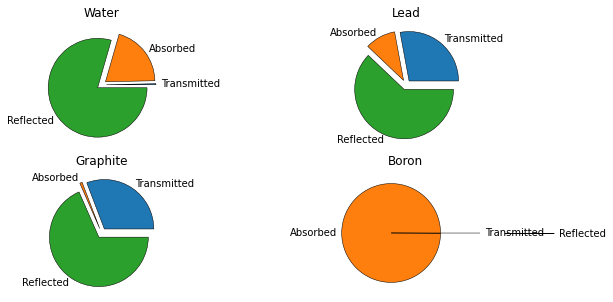

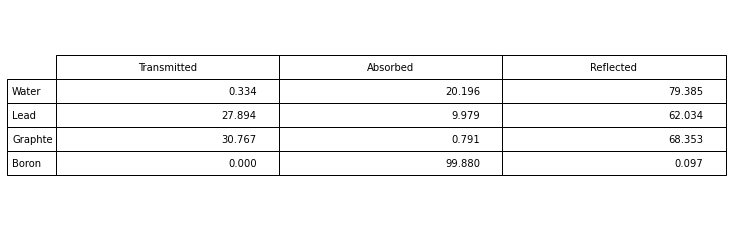

In [8]:
def path(absorbtion_area,scattering_area,density,mass, particles, thickness,material,iterations):
    """
    Can model large numbers of neutrons traveling through any material, once given the relavent information.
    Will repeat proccess multiple times in order to errors as well as most accurate results 
    
    Parameters
    ----------
    absorbtion_area : float
    scattering_area : float
    density : float
    mass : float
    particles : integer
    thickness : float
    material : string
    iterations : integer
    statement : boolean
    
    
    Returns
    -------
    percent_transmitted : float
    percent_absorbed : float
    percent_reflected : float
    error_percent_transmitted : float
    error_percent_absorbed : float 
    error_percent_reflected : float
    """
    #calculates number density, mean free path and probability of absorbtion for material entered 
    number_density = N_A*density/mass
    mean_freepath = 1/(number_density*(absorbtion_area*10**-24 + scattering_area*10**-24))
    prob_absorbtion = (number_density*absorbtion_area*10**-24)*mean_freepath
    freq_absorbed = np.zeros(iterations)
    freq_transmitted = np.zeros(iterations)
    freq_reflected = np.zeros(iterations)
    for i in range(iterations):
        
        absorbed = 0
        transmitted = 0
        reflected = 0
        #first step ensuring neutrons initally enter horizontally to slab 
        x = -mean_freepath*np.log(np.random.uniform(size = particles))
        
        while len(x)>0 :
            #checks if/how many neutrons have been transmitted 
            transmitted += np.count_nonzero(np.argwhere(x >= thickness))
            #checks if/how many neutrons have been reflected  
            reflected += np.count_nonzero(np.argwhere(x <= 0))
            
            x = np.delete(x, np.argwhere((x <= 0) | (x >= thickness)))
            #checks if/how many neutrons have been absorbed
            
            probability = np.random.uniform(size = len(x))
            absorbed += np.count_nonzero(np.argwhere(probability < prob_absorbtion))
            x = np.delete(x, np.argwhere(probability < prob_absorbtion))
            
            #adds next step to x direction 
            x += random_step(len(x), mean_freepath)[0]
            
        freq_absorbed[i] = absorbed
        freq_transmitted[i] = transmitted
        freq_reflected[i] = reflected
    #calculates the mean and standard deviations of all the different events 
    mean_absorbed, error_absorbed = np.mean(freq_absorbed), np.std(freq_absorbed)
    mean_transmitted, error_transmitted = np.mean(freq_transmitted), np.std(freq_transmitted)
    mean_reflected, error_reflected = np.mean(freq_reflected), np.std(freq_reflected)
    #covernts means and standard deviations into percentages
    percent_transmitted, error_percent_transmitted = (mean_transmitted/particles)*100, (error_transmitted/particles)*100
    percent_absorbed, error_percent_absorbed = (mean_absorbed/particles)*100, (error_absorbed/particles)*100
    percent_reflected, error_percent_reflected = (mean_reflected/particles)*100, (error_reflected/particles)*100

    return percent_transmitted,percent_absorbed,percent_reflected, error_percent_transmitted, error_percent_absorbed, error_percent_reflected

null_water = path(absorbtion_areas[0],scattering_areas[0],densities[0],masses[0],10000, 10, materials[0],10)
null_lead = path(absorbtion_areas[1],scattering_areas[1],densities[1],masses[1],10000,10,materials[1],10)
null_graphite = path(absorbtion_areas[2],scattering_areas[2],densities[2],masses[2],10000,10,materials[2],10)
null_boron = path(absorbtion_areas[3],scattering_areas[3],densities[3],masses[3],10000,10,materials[3],10)
#gathers all data nesscary to create a pie charts 
water_pie_data = np.array([null_water[0],null_water[1],null_water[2]])
lead_pie_data = np.array([null_lead[0],null_lead[1],null_lead[2]])
graphite_pie_data = np.array([null_graphite[0],null_graphite[1],null_graphite[2]])
boron_pie_data = np.array([null_boron[0],null_boron[1],null_boron[2]])
processes = np.array(['Transmitted','Absorbed','Reflected'])

fig_2 = plt.figure(figsize = [10,5])
axes = fig_2.add_subplot(221),fig_2.add_subplot(222),fig_2.add_subplot(223), fig_2.add_subplot(224)
#creates pie charts for all the data of the different materials 
axes[0].pie(water_pie_data, labels = processes,explode = (0.1,0.1,0.1), wedgeprops={"edgecolor":"k",'linewidth': 0.5})
axes[0].set_title('Water')
axes[1].pie(lead_pie_data, labels = processes, explode = (0.1,0.1,0.1), wedgeprops={"edgecolor":"k",'linewidth': 0.5})
axes[1].set_title('Lead')
axes[2].pie(graphite_pie_data, labels = processes, explode = (0.1,0.1,0.1), wedgeprops={"edgecolor":"k",'linewidth': 0.5})
axes[2].set_title('Graphite')
axes[3].pie(boron_pie_data, labels = processes, explode = (0.5,0.3,2) ,wedgeprops={"edgecolor":"k",'linewidth': 0.5})
axes[3].set_title('Boron')
plt.show()
#stores data in array to be added into a table
table_data = np.array([['{0:#.3f}'.format(null_water[0]),'{0:#.3f}'.format(null_water[1]),'{0:#.3f}'.format(null_water[2])],['{0:#.3f}'.format(null_lead[0]),'{0:#.3f}'.format(null_lead[1]),'{0:#.3f}'.format(null_lead[2])], ['{0:#.3f}'.format(null_graphite[0]),'{0:#.3f}'.format(null_graphite[1]),'{0:#.3f}'.format(null_graphite[2])],['{0:#.3f}'.format(null_boron[0]),'{0:#.3f}'.format(null_boron[1]),'{0:#.3f}'.format(null_boron[2])]])
fig_3 = plt.figure()
ax = fig_3.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
table = ax.table(table_data, rowLabels= materials, colLabels = processes, loc = 'center')
#removes graph boxes from plt.table
plt.box(on = None)
table.scale(2,2)
plt.show()


This table is consistent with the results from the visualisation stage above. Water does have the highest absorption rate and graphite does have the highest transmission rate. However, the reflection rates are not as close as the visualisation would suggest, with a range of ~ 18% between the rates. Heavy Water and graphite are often used as moderators within nuclear reactors [6], this is understandable for graphite as it has a high enough transmission rate and is not at risk of heating up from absorption due to its low absorption rate, it is therefore fair to assume that heavy water has similar properties to graphite. Water is not generally used to stop thermal neutrons but is instead used to absorb the heat energy from the nuclear system in order to create steam which is used to power turbines for the production of electricity [7].  The main use of lead in the field if nuclear physics is within lead-cooled fast reactors (LFR) [8] as Leads chemical properties make it a very good a protecting from nuclear radiation, despite what is shown in the table. This is because lead is extremely good at absorbing gamma rays produced during nuclear processes. Finally, it is clear to see that in boron that the vast majority of thermal neutrons are absorbed before they can travel through the slab. This explains why boron is used in the production of control rods [9], as control rods are the main safety precaution within a reactor and are dropped into the reactor at different depths in order to adjust the rate of reactions in order to be within a safe level. In the case of a meltdown the rods are fully submerged to terminate all reactions within the reactor

It was decided to test how the rates varied with the thickness of the slabs for each material

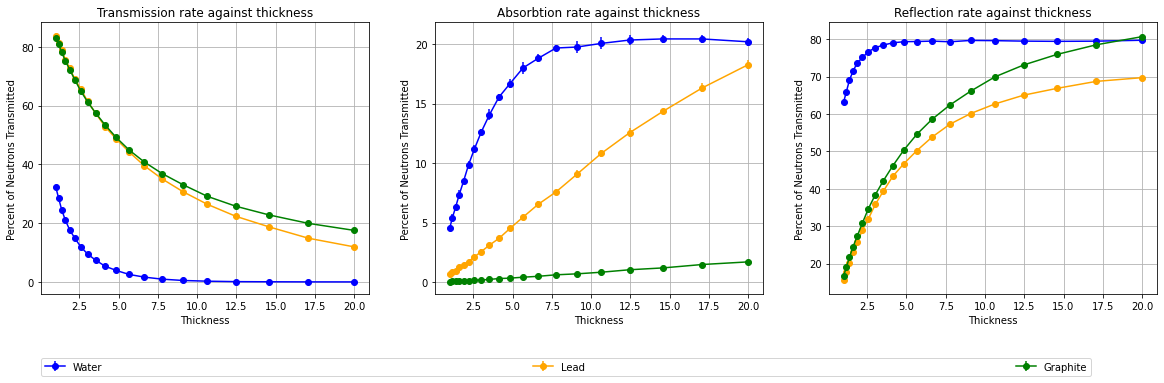

In [9]:
def thickness_iteration(water,lead,graphite) :
    """
    Plots the variation of transmission, absorbtion and scattering rates against thckness for each material
    
    Parameters
    ----------
    water : numpy array 
    lead : numpy array 
    graphite : numpy array 

    Returns
    -------
    nothing

    """
    #create figure
    plt.rcParams["figure.constrained_layout.use"]
    
    fig = plt.figure(figsize = [20,5])
    axes = fig.add_subplot(131),fig.add_subplot(132),fig.add_subplot(133)
    titles = np.array(['Transmission','Absorbtion','Reflection'])
    #plot data of rates against thickness for each material
    for i in range(0,3,1):
        #plot with errors corresponding to the standard deviation of each rate
        axes[i].errorbar(thickness, water[:,i], yerr = water[:,i+3], label = 'Water', color='b', marker='o', linestyle='-')
        axes[i].errorbar(thickness, lead[:,i], yerr = lead[:,i+3], label = 'Lead', color='orange', marker='o', linestyle='-')
        axes[i].errorbar(thickness, graphite[:,i], yerr = graphite[:,i+3], label = 'Graphite', color='g', marker='o', linestyle='-')
        axes[i].set_title('{0} rate against thickness'.format(titles[i]))
        axes[i].set_xlabel('Thickness')
        axes[i].set_ylabel('Percent of Neutrons Transmitted')
        axes[i].grid(True)
    #plot one ledgend describing all three graphs 
    axes[0].legend(bbox_to_anchor = (0,-0.3,3.2,0.6), borderaxespad=0 ,mode = 'expand',ncol=3)
    plt.show()
    
    return
#define a geometric distribution of thicknesses from 1 to 20cm 
thickness = np.geomspace(1,20, 20)
                        
water = np.zeros((len(thickness),6))
lead = np.zeros((len(thickness),6))
graphite = np.zeros((len(thickness),6))
#attain values for rates for Water, lead and Graphite
for i in range(len(thickness)): 
    water[i,:] = path(absorbtion_areas[0],scattering_areas[0],densities[0],masses[0],10000, thickness[i], 'Water',10)
    lead[i,:] = path(absorbtion_areas[1],scattering_areas[1],densities[1],masses[1],10000,thickness[i],'Lead',10)
    graphite[i,:] = path(absorbtion_areas[2],scattering_areas[2],densities[2],masses[2],10000,thickness[i],'Graphite',10)
                        
thickness_iteration(water,lead,graphite)

On all three of these graphs Graphite and Lead seem to follow a similar pattern with varying thickness, whereas water appears to be an anomaly. All water rates appear to plateau after a thickness of 10cm leading to an absorption rate ~ 20%, a reflection rate of ~ 80 and a transmission rate of ~ 0%. This is perhaps due to waters high scattering and absorption cross sections in comparison to lead and graphite. The transmission rate for graphite and lead follows a similar decaying exponential pattern. Whereas their reflection rates rise to a Plateau. Finally, the absorption rates both raise linearly but for graphite the change in absorbing rate is insignificant in comparison to the change of its transmission and reflection rates. 

Finally, the last section of this report is dedicated to calculating attenuation lengths for all three materials. Thanks to the data for varying thicknesses which has been calculated above we now have all the data required in order to find the attenuation lengths of the three materials when two processes are available. The attenuation_length_true function works similarly to the attenuation_length function seen previously however instead of using histogram data in order to calculate the attenuation length this function uses the transmission rates of the three materials. 

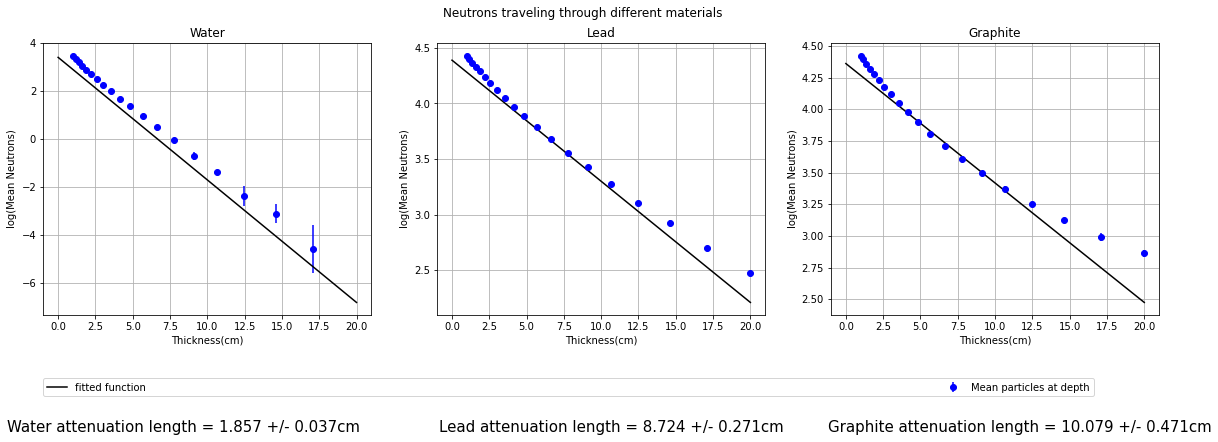

In [10]:
def attenuation_length_true(water,lead,graphite):
    """
    Uses transmission rates for varying thickesses in order to calculate the attenuation lengths
    of materials with two processes occuring
    
    Parameters
    ----------
    water : numpy array 
    lead : numpy array 
    graphite : numpy array 

    Returns
    -------
    nothing
    """
    #creates arrays to allow
    mean_vals = np.array([water[:,0],lead[:,0],graphite[:,0]], dtype=float)
    error_vals = np.array([water[:,3],lead[:,3],graphite[:,3]], dtype=float)
    m = np.zeros(3)
    m_error = np.zeros(3) 
    
    fig = plt.figure(figsize = [20,5])
    axes = fig.add_subplot(131),fig.add_subplot(132),fig.add_subplot(133)
    materials = np.array(['Water', 'Lead', 'Graphite'])
    positions = np.array([0.1,0.4,0.67])
    for i in range(0,3,1):
        #delete values where rate is zero in order to avoid true divide error from poly fit 
        error_val = np.delete(error_vals[i],np.argwhere(mean_vals[i] == 0))
        thicknesses = np.delete(thickness,np.argwhere(mean_vals[i] == 0))
        mean_val = np.delete(mean_vals[i],np.argwhere(mean_vals[i] == 0))
        
        coeff, cov = np.polyfit(thicknesses,np.log(mean_val),1,cov = True,w=mean_val/error_val)
        m = coeff[0]
        c = coeff[1]
        m_error, c_error = np.sqrt(np.diag(cov))
        length = -1/m
        length_error = m_error/m**2
        #creates a straight line from fitted parameters 
        fit_y = m * np.linspace(1,20,1000) + c
        axes[i].errorbar(thicknesses, np.log(mean_val), yerr = error_val/mean_val, label = 'Mean particles at depth', fmt = 'bo')
        axes[i].plot(np.linspace(0,20,1000),fit_y,'k-',label = 'fitted function')
        axes[i].set_title('{name}'.format(name = materials[i]))
        axes[i].set_xlabel('Thickness(cm)')
        axes[i].set_ylabel('log(Mean Neutrons)')
        axes[i].grid(True)
        plt.figtext(positions[i],-0.2,('{name} attenuation length = {0:#.3f} +/- {1:#.3f}cm'.format(length,length_error, name = materials[i])),fontsize =15)
    fig.suptitle('Neutrons traveling through different materials')
    axes[0].legend(bbox_to_anchor = (0,-0.3,3.2,0.6), borderaxespad=0 ,mode = 'expand',ncol=3)
    plt.show()
  
    
attenuation_length_true(water,lead,graphite)

The Attenuation length of water is now significantly shorter due to the additional process of scattering. This is due to the waters large microscopic scattering cross section which massively reduces its mean free path, meaning that the neutron is no longer guaranteed to be absorbed once it interacts with a particle within water. These results further enforce the results already found trough this report which is that water has the best neutron shielding out of all of the three materials considered. 

## Bonus : Woodcock method 

The woodcock method is an alternative way of modelling the paths of thermal neutrons travelling through a material. The woodcock method is arguably better than Markov Chain Monte Carlo modelling as it is an easy method for modelling thermal neutrons as they progress through a slab consisting of several different materials. This is done through the introduction fictitious steps, in which a neutron will travel a distance within a slab, but will keep the same direction as its most recent real step and it will ignore the effects of scattering and absorption. The distance these neutrons travel is determined by the material with the largest macroscopic cross section, $\Sigma_t$: 
$$
\Sigma_t = max(\Sigma_1,\Sigma_2)\space\space\space(10)
$$
Where $\Sigma_1$, $\Sigma_2$ are the macroscopic cross sections of materials 1 and 2 respectively. Due to this the neutrons are assumed to travel with a constant mean free path, $\lambda$ which is dependent on the material with the largest macroscopic cross section.
$$
\lambda = 1/\Sigma_t \space\space\space(11)
$$
A step is defined as fictitious when:
$$
u < \Sigma_i/\Sigma_t\space\space\space(12)
$$
Where $\Sigma_i$ is the macroscopic cross section that the neutron is currently progressing through.


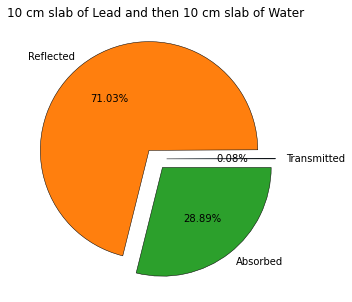

------------------------------------------
Transmission Through a slab of 10 cm of Lead and 10 cm of Water
------------------------------------------
Thickness: 20 cm
Total Neutrons: 10000
Percentage Reflected: 70.961 ± 0.250
Percentage Absorbed: 28.857 ± 0.260
Percentage Transmitted: 0.081 ± 0.018
------------------------------------------


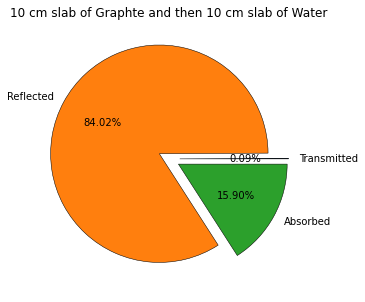

------------------------------------------
Transmission Through a slab of 10 cm of Graphte and 10 cm of Water
------------------------------------------
Thickness: 20 cm
Total Neutrons: 10000
Percentage Reflected: 83.940 ± 0.481
Percentage Absorbed: 15.883 ± 0.481
Percentage Transmitted: 0.086 ± 0.023
------------------------------------------


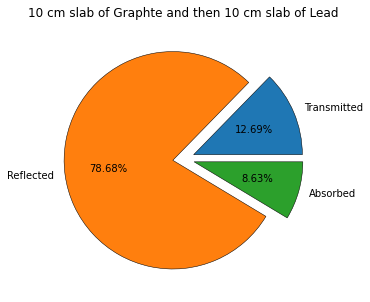

------------------------------------------
Transmission Through a slab of 10 cm of Graphte and 10 cm of Lead
------------------------------------------
Thickness: 20 cm
Total Neutrons: 10000
Percentage Reflected: 78.609 ± 0.375
Percentage Absorbed: 8.621 ± 0.264
Percentage Transmitted: 12.684 ± 0.296
------------------------------------------


In [11]:

def woodcock(absorbtion_area,scattering_area,density,mass, particles, thicknesses,iterations,names):
    """
    Using the woodcock method, can model large numbers of neutrons traveling through more then one material
    once given the relavent information.
    Will repeat proccess multiple times in order to errors as well as most accurate results 
    
    Parameters
    ----------
    absorbtion_area : numpy array
    scattering_area : numpy array
    density : numpy array
    mass : numpy array
    particles : integer
    thickness : float
    iterations : integer
    names  : numpy array
    
    
    Returns
    -------
    Nothing
    """
    #create arrays of relavent constants
    number_density = N_A*density/mass
    mean_freepaths = 1/(number_density*(absorbtion_area*10**-24 + scattering_area*10**-24))
    sigmas = number_density*(absorbtion_area*10**-24 + scattering_area*10**-24)
    prob_absorbtion = mean_freepaths*number_density*absorbtion_area*10**-24
    #Define the total thickness of the two slabs 
    total_thickness = np.sum(thicknesses)

    #Determine the largest macroscopic cross section
    max_sigma = np.maximum(sigmas[0],sigmas[1])
    #Define mean free path using the largest sigma
    mean_freepath = 1/max_sigma
    #calculates the probability of a neutron taking a fictitious step in both materials 
    prob_fictitous = sigmas/max_sigma
    
    freq_absorbed = np.zeros(iterations)
    freq_transmitted = np.zeros(iterations)
    freq_reflected = np.zeros(iterations)
        
    for i in range(iterations):

        absorbed = 0
        transmitted = 0
        reflected = 0
        
        x = np.zeros(particles)
        #angle values need memory due to fictitious steps 
        theta = np.full(particles, np.pi/2)
        phi = np.full(particles, 0.0)
    
        x = -mean_freepath*np.log(np.random.uniform(size = len(x)))

        
        while len(x) > 0 :
            #finds and deletes any particles which have left the slabs and determines if they were transmitted or reflected 
            transmitted += np.count_nonzero(np.argwhere(x >= total_thickness))

            reflected += np.count_nonzero(np.argwhere(x <= 0))

            theta = np.delete(theta,np.argwhere((x <= 0) | (x >= total_thickness)) )
            phi = np.delete(phi, np.argwhere((x <= 0) | (x >= total_thickness)))
            x = np.delete(x, np.argwhere((x <= 0) | (x >= total_thickness)))
            #mu is the assigned fictitious probability fo each neutron
            mu = np.random.uniform(size = len(x))
            #makes an array the length of x but all contained values are False 
            real_step = np.full(len(x),False)
            # defines which particles are taking a real step inside the first slab
            real_step[np.argwhere((x < thicknesses[0]) & (mu < prob_fictitous[0]))] = True
            #generate th probability of each neutron being absorbed
            probability = np.random.uniform(size = len(x))
            #calculate how many are absorbed 
            absorbed += np.count_nonzero(np.argwhere((real_step)  & (probability < prob_absorbtion[0])))
            #delete absorbed particles data form memory 
            theta = np.delete(theta,np.argwhere((real_step)  & (probability < prob_absorbtion[0])))
            phi = np.delete(phi, np.argwhere((real_step)  & (probability < prob_absorbtion[0])))
            x = np.delete(x, np.argwhere((real_step)  & (probability < prob_absorbtion[0])))
            mu = np.delete(mu, np.argwhere((real_step)  & (probability < prob_absorbtion[0])))
            probability = np.delete(probability, np.argwhere((real_step)  & (probability < prob_absorbtion[0])))
            #reset real steps to determine if any neutrons  in the second slab are taking a real step
            real_step = np.full(len(x),False)
            real_step[np.argwhere((x > thicknesses[0]) & (mu < prob_fictitous[1]))] = True
            absorbed += np.count_nonzero(np.argwhere((real_step)  & (probability < prob_absorbtion[1])))

            theta = np.delete(theta,np.argwhere((real_step)  & (probability < prob_absorbtion[1])))
            phi = np.delete(phi, np.argwhere((real_step)  & (probability < prob_absorbtion[1])))
            x = np.delete(x, np.argwhere((real_step)  & (probability < prob_absorbtion[1])))
            mu = np.delete(mu,np.argwhere((real_step)  & (probability < prob_absorbtion[1])))
            #generate all remaining particles which took fictitious steps
            real_step = np.full(len(x),False)
            real_step[np.argwhere((x > thicknesses[0]) & (mu < prob_fictitous[1]))] = True
            real_step[np.argwhere((x < thicknesses[0]) & (mu < prob_fictitous[0]))] = True
            #calculate a new distnace for particles to travel
            distance = -mean_freepath*np.log(np.random.uniform(size = len(x)))
            #update angle values for particles taking real steps 
            theta[real_step] += np.arccos(1 - 2*np.random.uniform(size = len(np.argwhere(real_step))))
            phi[real_step] += np.random.uniform(0,2*np.pi, size = len(np.argwhere(real_step)))

            x += distance*np.sin(theta)*np.cos(phi)

        freq_absorbed[i] = absorbed
        freq_transmitted[i] = transmitted
        freq_reflected[i] = reflected 
        
    mean_absorbed, error_absorbed = np.mean(freq_absorbed), np.std(freq_absorbed)
    mean_transmitted, error_transmitted = np.mean(freq_transmitted), np.std(freq_transmitted)
    mean_reflected, error_reflected = np.mean(freq_reflected), np.std(freq_reflected)
    
    percent_transmitted, error_percent_transmitted = (mean_transmitted/particles)*100, (error_transmitted/particles)*100
    percent_absorbed, error_percent_absorbed = (mean_absorbed/particles)*100, (error_absorbed/particles)*100
    percent_reflected, error_percent_reflected = (mean_reflected/particles)*100, (error_reflected/particles)*100

    pie_data = np.array([percent_transmitted,percent_reflected,percent_absorbed])
    processes = np.array(['Transmitted','Reflected','Absorbed'])
    fig = plt.figure(figsize = [10,5])
    axes = fig.add_subplot(111)
    #creates pie charts for rate the data of the slabs
    axes.pie(pie_data, labels = processes,explode = (0.1,0.1,0.1), wedgeprops={"edgecolor":"k",'linewidth': 0.5},autopct = '%1.2f%%')
    axes.set_title('{0} cm slab of {1} and then {2} cm slab of {3}'.format(thicknesses[0],names[0],thicknesses[1],names[1]))
    plt.show()
    print("------------------------------------------\n\
Transmission Through a slab of {0} cm of {1} and {2} cm of {3}\n\
------------------------------------------\n\
Thickness: {4} cm\n\
Total Neutrons: 10000\n\
Percentage Reflected: {5:#.3f} \u00b1 {6:#.3f}\n\
Percentage Absorbed: {7:#.3f} \u00b1 {8:#.3f}\n\
Percentage Transmitted: {9:#.3f} \u00b1 {10:#.3f}\n\
------------------------------------------".format(thicknesses[0],names[0],thicknesses[1],names[1], total_thickness,percent_reflected, error_percent_reflected,percent_absorbed, error_percent_absorbed,percent_transmitted, error_percent_transmitted))
    return
#define arrays definig the materials and thicknesses of the 2 slabs in use  
a_1 = np.array([absorbtion_areas[1],absorbtion_areas[0]])
s_1 = np.array([scattering_areas[1],scattering_areas[0]])
d_1 = np.array([densities[1],densities[0]])
m_1 = np.array([masses[1],masses[0]])
names_1 = np.array([materials[1],materials[0]])
slabs_1 = np.array([10,10])
woodcock(a_1,s_1,d_1,m_1,10000, slabs_1, 10,names_1)

a_2 = np.array([absorbtion_areas[2],absorbtion_areas[0]])
s_2 = np.array([scattering_areas[2],scattering_areas[0]])
d_2 = np.array([densities[2],densities[0]])
m_2 = np.array([masses[2],masses[0]])
names_2 = np.array([materials[2],materials[0]])
slabs_2 = np.array([10,10])
woodcock(a_2,s_2,d_2,m_2,10000, slabs_2, 10,names_2)

a_3 = np.array([absorbtion_areas[2],absorbtion_areas[1]])
s_3 = np.array([scattering_areas[2],scattering_areas[1]])
d_3 = np.array([densities[2],densities[1]])
m_3 = np.array([masses[2],masses[1]])
names_3 = np.array([materials[2],materials[1]])
slabs_3 = np.array([10,10])
woodcock(a_3,s_3,d_3,m_3,10000, slabs_3, 10,names_3)



## Conclusion 

In conclusion Markov Chain Monte Carlo modelling is extremely useful for modelling neutrons travelling throughout different materials revealing that water has an extremely low transmission rate but also has the highest absorption and reflection rates out of the three materials modelled. Whereas Graphite had the highest transmission rate but not by much more than Lead. <br>
Boron is potentially the best absorber of thermal neutrons to exist making it a crucial element in the nuclear reaction safety in the form of control rods.   <br>
Woodcock is a more versatile method for modelling thermal neutrons allowing them to travel through multiple different materials in one simulation. This could extremely useful for finding combinations of elements which could improve  upon the  neutron shielding of a single element by itself.  


## References

[1] - Editor, C.C. (n.d.). pseudorandom number generator - Glossary | CSRC. [online] csrc.nist.gov. Available at: https://csrc.nist.gov/glossary/term/pseudorandom_number_generator [Accessed 12 May 2023]. <br>
[2] - https://jupyter.cs.man.ac.uk/user/k55624jr/notebooks/phys20762-code11randssp.ipynb randssp code provided by the University of Manshester<br>
[3] - Marsaglia, G. (1968). RANDOM NUMBERS FALL MAINLY IN THE PLANES. Proceedings of the National Academy of Sciences, 61(1), pp.25–28. doi:https://doi.org/10.1073/pnas.61.1.25. [Accessed 12 May 2023] <br>
[4] - Columbia University Mailman School of Public Health. (2016). Markov Chain Monte Carlo. [online] Available at: https://www.publichealth.columbia.edu/research/population-health-methods/markov-chain-monte-carlo#:~:text=Markov%20Chain%20Monte%20Carlo%20(MCMC [Accessed 15 May 2023]. <br>
[5] - Microscopic cross section data for boron from: www.ncnr.nist.gov. (n.d.). Neutron Scattering Lengths and cross sections. [online] Available at: https://www.ncnr.nist.gov/resources/n-lengths/elements/b.html [Accessed 12 May 2023]. <br>
[6] - hyperphysics.phy-astr.gsu.edu. (n.d.). The Moderation of Fission Reactions. [online] Available at: http://hyperphysics.phy-astr.gsu.edu/hbase/NucEne/moder.html#:~:text=Water%20and%20carbon%20(graphite)%20are [Accessed 12 May 2023].<br>
[7] - world-nuclear.org. (n.d.). Cooling Power Plants | Power Plant Water Use for Cooling - World Nuclear Association. [online] Available at: https://world-nuclear.org/information-library/current-and-future-generation/cooling-power-plants.aspx#:~:text=The%20most%20common%20types%20of [Accessed 12 May 2023].<br>
[8] - Mohanakrishnan, P., Singh, O.P. and Umasankari, K. (2021). Physics of nuclear reactors. Academic Press. <br>
[9] - Energy Education (2018). Control rod - Energy Education. [online] Energyeducation.ca. Available at: https://energyeducation.ca/encyclopedia/Control_rod. [Accessed 12 May 2023]